<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Bag of Visual Words - Assignment 2

     Instructor: Kris Kitani                   TAs: Sheng-Yu, Jinkun, Rawal, Arka, Rohan

## Theory Questions

This section should include the visualizations and answers to specifically highlighted questions from P1 to P4. This section will be manually Graded 

#### Q1.1.1 (5 Points WriteUp)
What visual properties do each of the filter functions (See Figure below) pick up? You should group the filters into categories by its purpose/functionality. Also, why do we need multiple scales of filter responses? **Answer in the writeup. Answer in your write-up.**

<img align="center" src="figures/filters_image.png" width="500">
<figcaption align="center"><b>Figure1. The provided multi-scale filter bank</b></figcaption>

1. The Gaussian filters (row 1) help smoothen the image and pick up sharp increases in intensity (point sources)
2. The Laplacian filter (row 2) will give large responses at edges irrespective of orientation due to spherical symmetry
3. The difference of gaussian filters (rows 3 and 4) are for oriented edges (vertical and horizontal respectively), the combination of which helps in establishing corners and edge magnitude + direction

#### Q1.1.2 Filter Response Visualization

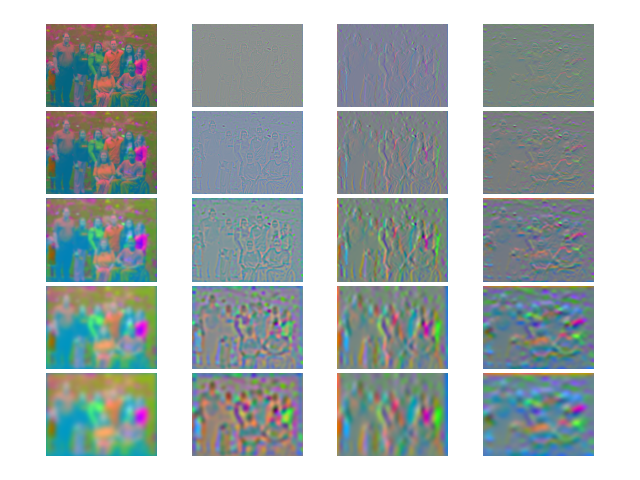

#### Q1.2.1 Harris Corner Visualization
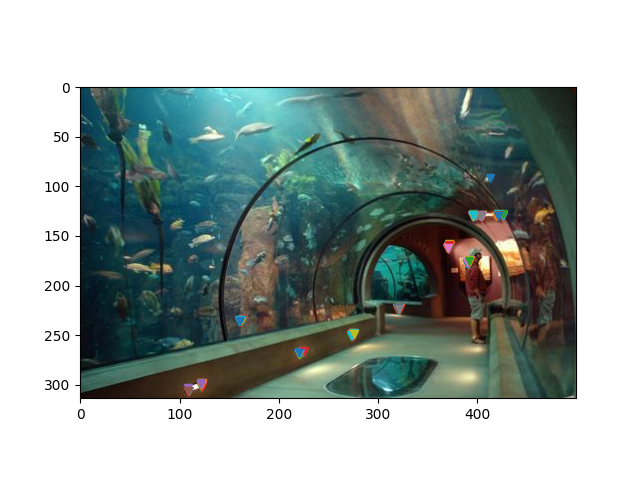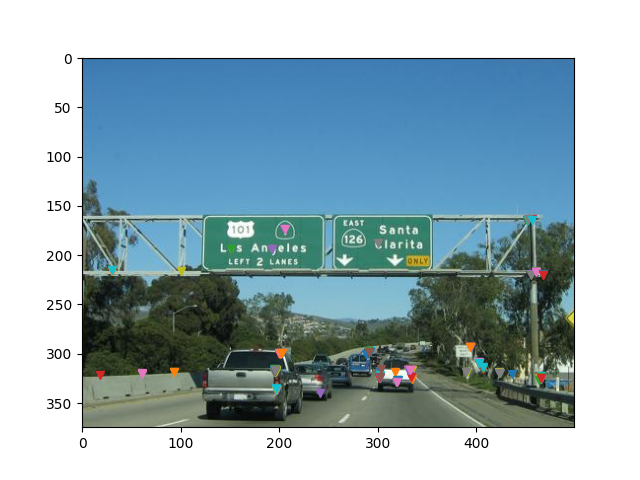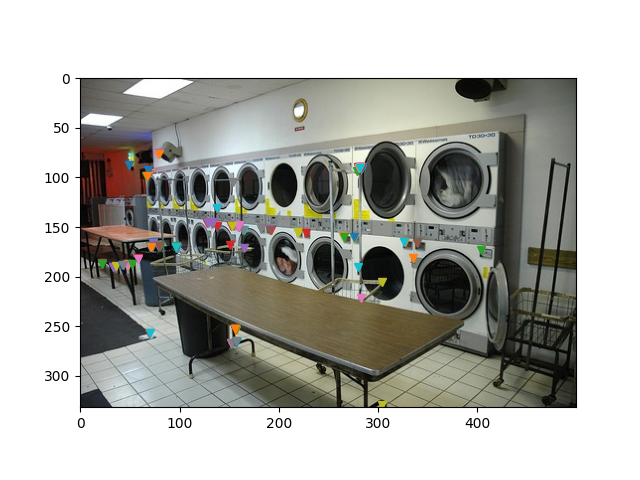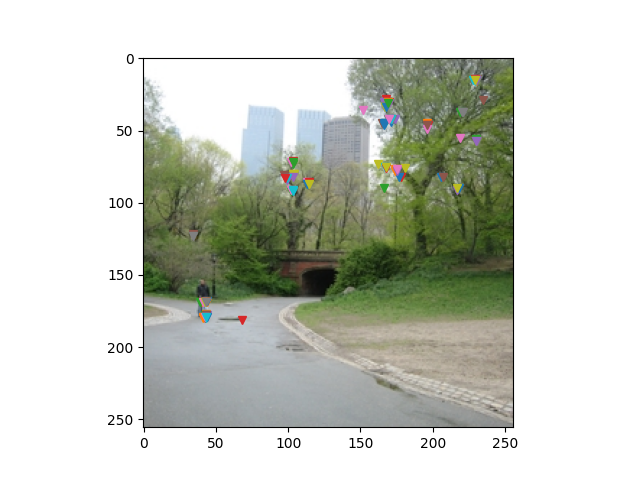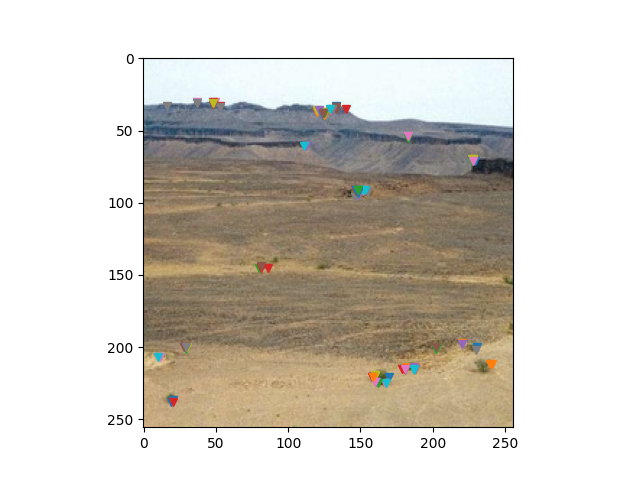

### Q1.3.1 (5 Points WriteUp)

Visualize three wordmaps of images from any one of the category. **Include these in your write-up, along with the original RGB images. Include some comments on these visualizations: do the “word” boundaries make sense to you?**. We have provided helper function to save and visualize the resulting wordmap in the util.py file. They should look similar to the ones in Figure 2.

<img align="center" src="./figures/textons.jpg" width="800">
<figcaption align = "center"><b>Figure 2. Visual words over images. You will use the spatially un-ordered distribution of visual words in a region (a bag of visual words) as a feature for scene classification, with some coarse information provided by spatial pyramid matching [2]</b></figcaption>

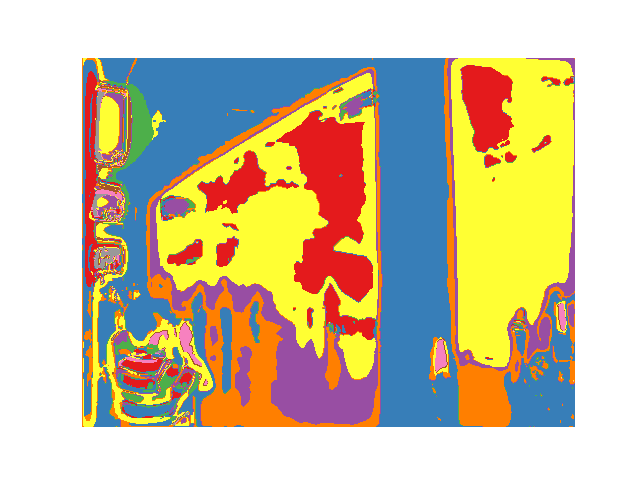


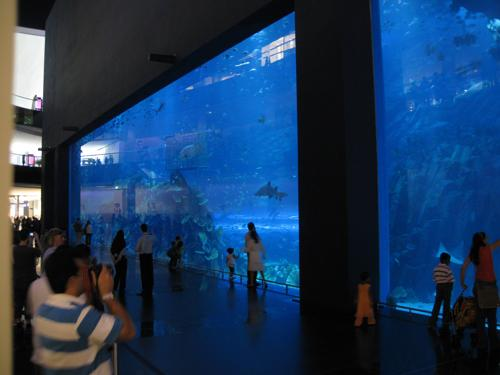

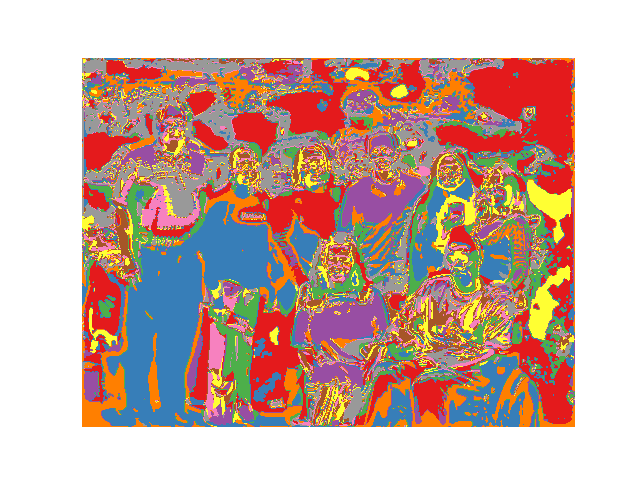

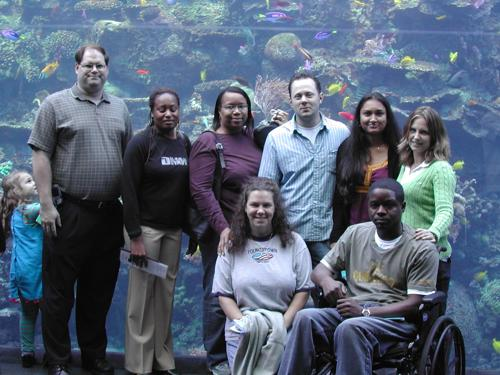

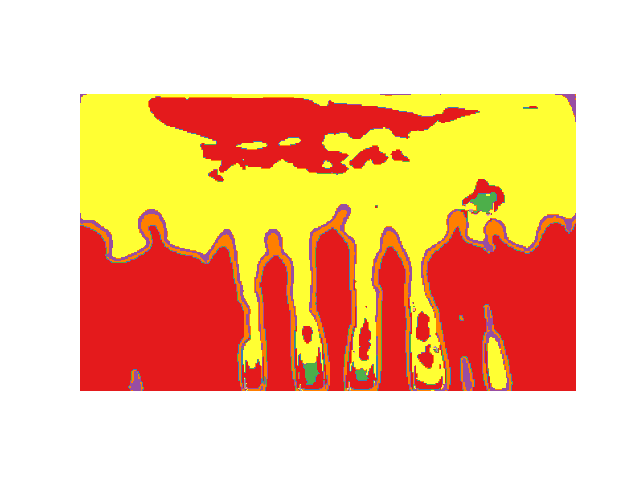

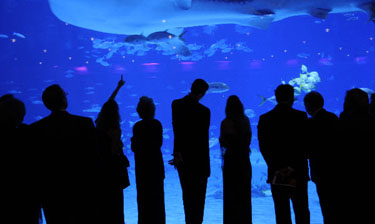

From the above visualization, we can see that the image boundaries coincide with word boundaries when the image contrast is clear - this is due to our harris corner detector prominently picking out these features and hence good training of our wordmap on these edges

In the second image, the boundaries stop making sense since there is a large number of background clutter which means the corner detector is not a great way of picking unique features - clearly seen in the visualized wordmap

### Q2.1
**For 5 Images, include their visual word maps and histograms**

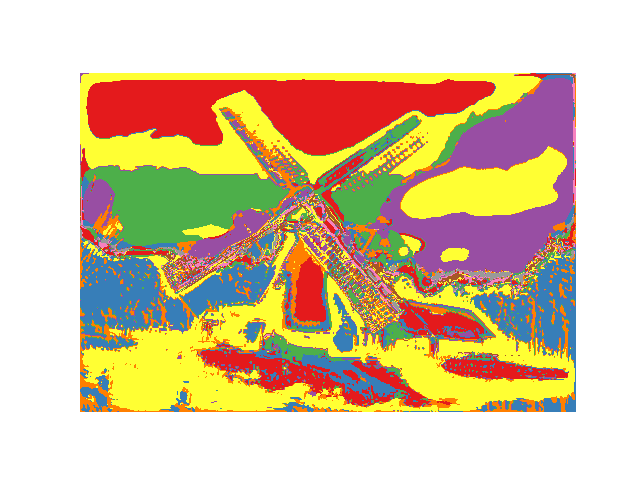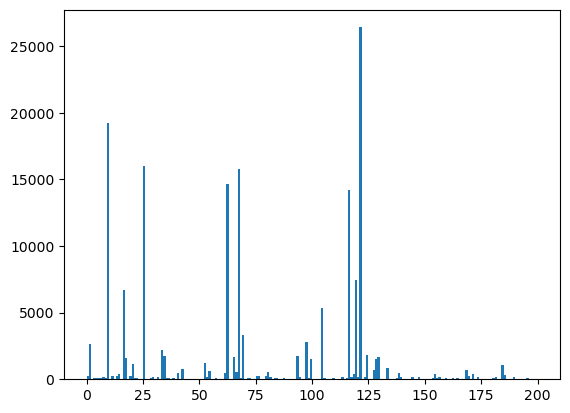

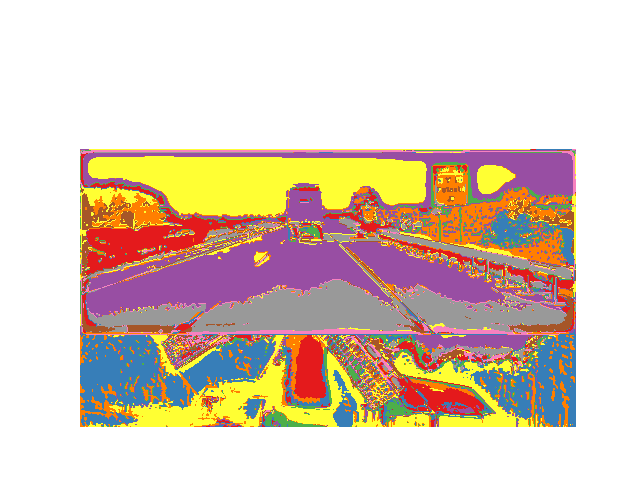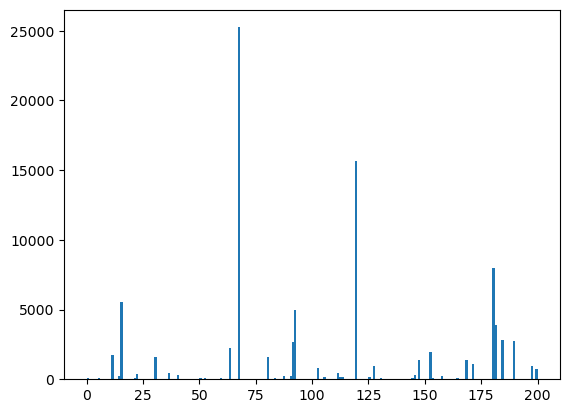

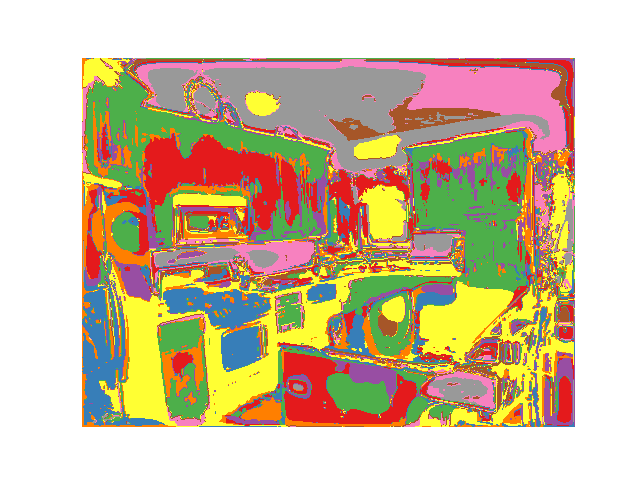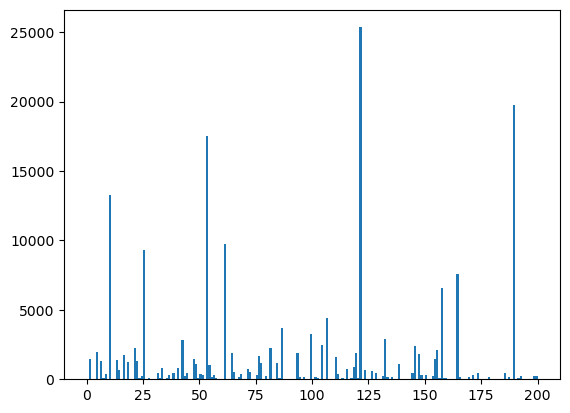

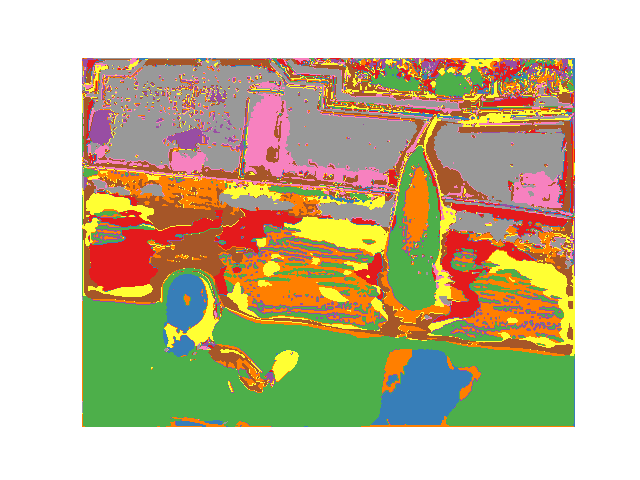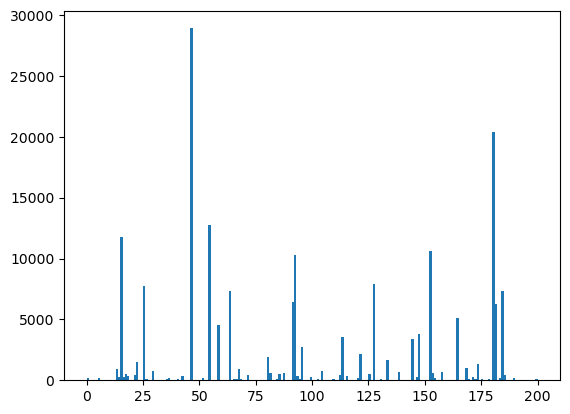

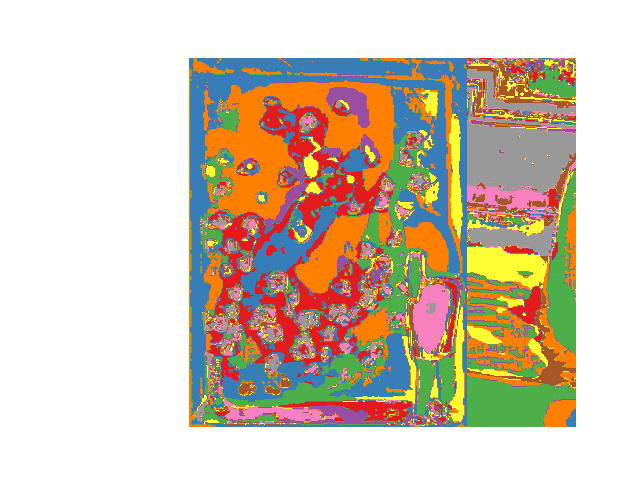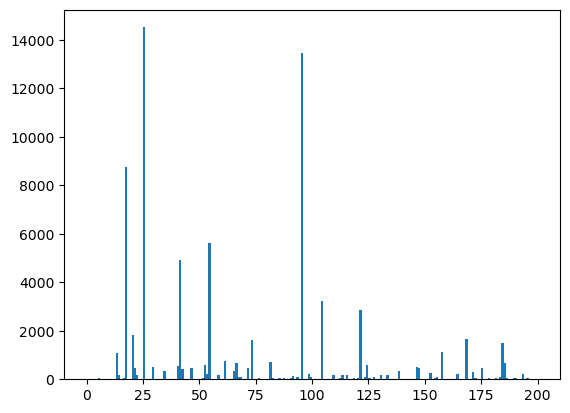

### Q3.1.1 
Submit the visualization of Confusion Matrix and the Accuracy value

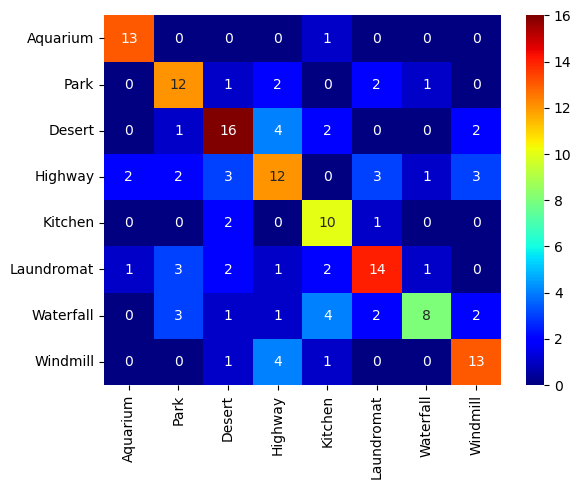
## Accuracy value = 0.61

#### Q3.1.2 (5 points WriteUp):

As there are some classes/samples that are more difficult to classify than the rest using the bags-of-words approach, they are more easily classified incorrectly into other categories. **List some of these classes/samples and discuss why they are more difficult.**

The Laundromat, Kitchen, and Waterfall categories are the most susceptible to cross-labelling due to the similarity in their feature distributions. Kitchens have faucets which could be classified as waterfalls and have boxed equipment which is highly correlated to washing machines. This is observed in the confusion matrix above with the lowest scores coming from these three categories being misrepresented. Just using corners in these cases will prove insufficient to tackle the similarities

### Q3.1.3 [Extra Credit](10 points) Manually Graded:

Now that you have seen how well your recognition system can perform on a set of real images, you can experiment with different ways of improving this baseline system. 

Include the changes, modification you made and the impact it had on accuracy.

Tune the system you build to reach around 65\% accuracy on the provided test set (``data/test_data.npz``). **In your writeup, document what you did to achieve such performance: (1) what you did, (2) what you expected would happen, and (3) what actually happened.** Also, include a file called ``custom.py/ipynb`` for running your code.

To tune the feature-set, I used the following approaches -
1. Hyper-parameter tuning: The default $\alpha$ and $N_{c}$ at $150$ and $200$ respectively gave good results, with accuracy at 61%. Trying other values led to minimal change in the accuracy. Increasing $L$ to 4 gave an accuracy of 63.5% which is the highest I obtained from Parameter tuning

2. Classifier change - Instead of nearest neighbour, I used both naive bayes (gaussian) and SVM to minimal benefit. Gaussian Naive Bayes gives lower accuracy than kNN, probably due to the nature of the 1000 image dataset , topping at 58%. For SVM, the classifier used did not give very good accuracy, only around 15%. This may have been a bug in my implementation which I did not have time to iron out. I expected higher accuracy from SVM, around 68-69% at the very least.

3. Image augmentation - Random noise and mean colour subtraction were tried, but to no positive effect. I expected randmo noise to improve the learning due to only capturing essential elements but due to the small number of images and corner detection, the random noise caused a lot of artefacts to appear as corners which siginifcantly impacted accuracy

In the below cell I have attached the two files needed to run the code - custom.py and dictionary_custom.npy from the newly tuned parameters

### Q3.1.4 [Extra Credit] (5 points write up):
**GIST feature descriptor:** As introduced during the lecture, GIST feature descriptor is a feature extractor based on Gabor Filters. When we apply it to images, we have to implement the 2D Gabor Filters as described below

<img align="center" src="figures/gist.png" width="800">

<font color="blue">**In your writeup: How does GIST descriptor affect the performance? Better or worse? Explain your reasoning?**

In [6]:
def extract_filter_responses(image):
    '''
    Extracts the filter responses for the given image.

    [input]
    * image: numpy.ndarray of shape (H, W) or (H, W, 3)

    [output]
    * filter_responses: numpy.ndarray of shape (H, W, 3F)
    '''
    
    
    
    if(len(image.shape) == 2):
        image = np.stack((image, image, image), axis=-1)

    if(image.shape == 3 and image.shape[2] == 1):
        image = np.concatenate((image, image, image), axis=-1)

    if(image.shape[2] == 4):
        image = image[:, :, 0:3]

    image = skimage.color.rgb2lab(image)

    H = image.shape[0] 
    W = image.shape[1]
    filter_responses = np.array([])
    '''
    HINTS: 
    1.> Iterate through the scales (5) which can be 1, 2, 4, 8, 8$sqrt{2}$
    2.> use scipy.ndimage.gaussian_* to create filters
    3.> Iterate over each of the three channels independently
    4.> stack the filters together to (H, W,3F) dim
    '''
    # ----- TODO -----
    
    # YOUR CODE HERE
    scales = np.array([0.05,0.1,0.15,0.2])
    ch1 = image[:,:,0]
    ch2 = image[:,:,1]
    ch3 = image[:,:,2]
    gamma = 1 
    for sigma in scales:
        hor_ch1_r, hor_ch1_i = skimage.filters.gabor(ch1, sigma, theta=0, mode ='constant')
        hor_ch2_r, hor_ch2_i = skimage.filters.gabor(ch2, sigma, theta=0, mode ='constant')
        hor_ch3_r, hor_ch3_i = skimage.filters.gabor(ch3, sigma, theta=0, mode ='constant')
        # hor_ch1 = np.hypot(hor_ch1_r, hor_ch1_i); hor_ch2 = np.hypot(hor_ch2_r, hor_ch2_i); hor_ch3 = np.hypot(hor_ch3_r, hor_ch3_i)
        gstack = np.dstack([hor_ch1_r, hor_ch2_r, hor_ch3_r])
        ver_ch1_r, ver_ch1_i = skimage.filters.gabor(ch1, sigma, theta=np.pi/2,  mode ='constant')
        ver_ch2_r, ver_ch2_i = skimage.filters.gabor(ch2, sigma, theta=np.pi/2,  mode ='constant')
        ver_ch3_r, ver_ch3_i = skimage.filters.gabor(ch3, sigma, theta=np.pi/2,  mode ='constant')
        # ver_ch1 = np.hypot(ver_ch1_r, ver_ch1_i); ver_ch2 = np.hypot(ver_ch2_r, hor_ch2_i); ver_ch3 = np.hypot(ver_ch3_r, ver_ch3_i)
        lstack = np.dstack([ver_ch1_r, ver_ch2_r, ver_ch3_r])
        thirty_ch1_r, thirty_ch1_i = skimage.filters.gabor(ch1, sigma, theta=np.pi/6,  mode ='constant')
        thirty_ch2_r, thirty_ch2_i = skimage.filters.gabor(ch2, sigma, theta=np.pi/6,  mode ='constant')
        thirty_ch3_r, thirty_ch3_i = skimage.filters.gabor(ch3, sigma, theta=np.pi/6,  mode ='constant')
        # thirty_ch1 = np.hypot(thirty_ch1_r, thirty_ch1_i); thirty_ch2 = np.hypot(thirty_ch2_r, thirty_ch2_i); thirty_ch3 = np.hypot(thirty_ch3_r, thirty_ch3_i)
        dogxstack = np.dstack([thirty_ch1_r, thirty_ch2_r, thirty_ch3_r])
        sixty_ch1_r, sixty_ch1_i = skimage.filters.gabor(ch1, sigma, theta=np.pi/3,  mode ='constant')
        sixty_ch2_r, sixty_ch2_i = skimage.filters.gabor(ch2, sigma, theta=np.pi/3,  mode ='constant')
        sixty_ch3_r, sixty_ch3_i = skimage.filters.gabor(ch3, sigma, theta=np.pi/3,  mode ='constant')
        # sixty_ch1 = np.hypot(sixty_ch1_r, sixty_ch1_i); sixty_ch2 = np.hypot(sixty_ch2_r, sixty_ch2_i); sixty_ch3 = np.hypot(sixty_ch3_r, sixty_ch3_i)
        dogystack = np.dstack([sixty_ch1_r, sixty_ch2_r, sixty_ch3_r])
        ff_ch1_r, ff_ch1_i = skimage.filters.gabor(ch1, sigma, theta=np.pi/4,  mode ='constant')
        ff_ch2_r, ff_ch2_i = skimage.filters.gabor(ch2, sigma, theta=np.pi/4,  mode ='constant')
        ff_ch3_r, ff_ch3_i = skimage.filters.gabor(ch3, sigma, theta=np.pi/4,  mode ='constant')
        # ff_ch1 = np.hypot(ff_ch1_r, ff_ch1_i); ff_ch2 = np.hypot(ff_ch2_r, ff_ch2_i); ff_ch3 = np.hypot(ff_ch3_r, ff_ch3_i)
        ffstack = np.dstack([ff_ch1_r, ff_ch2_r, ff_ch3_r])
        of_ch1_r, of_ch1_i = skimage.filters.gabor(ch1, sigma, theta=np.pi/12, mode ='constant')
        of_ch2_r, of_ch2_i = skimage.filters.gabor(ch2, sigma, theta=np.pi/12, mode ='constant')
        of_ch3_r, of_ch3_i = skimage.filters.gabor(ch3, sigma, theta=np.pi/12, mode ='constant')
        # of_ch1 = np.hypot(of_ch1_r, of_ch1_i); of_ch2 = np.hypot(of_ch2_r, of_ch2_i); of_ch3 = np.hypot(of_ch3_r, of_ch3_i)
        ofstack = np.dstack([of_ch1_r, of_ch2_r, of_ch3_r])
        sf_ch1_r, sf_ch1_i = skimage.filters.gabor(ch1, sigma, theta=5*np.pi/12, mode ='constant')
        sf_ch2_r, sf_ch2_i = skimage.filters.gabor(ch2, sigma, theta=5*np.pi/12, mode ='constant')
        sf_ch3_r, sf_ch3_i = skimage.filters.gabor(ch3, sigma, theta=5*np.pi/12, mode ='constant')
        # sf_ch1 = np.hypot(sf_ch1_r, sf_ch1_i); sf_ch2 = np.hypot(sf_ch2_r, sf_ch2_i); sf_ch3 = np.hypot(sf_ch3_r, sf_ch3_i)
        sfstack = np.dstack([sf_ch1_r, sf_ch2_r, sf_ch3_r])
        filter_stack = np.dstack([gstack, ofstack, dogxstack, ffstack, dogystack, sfstack, lstack])
        filter_responses = np.dstack([filter_responses, filter_stack]) if filter_responses.size else filter_stack
        
    return filter_responses

    
def gist_per_image(image):
    filter_responses = extract_filter_responses(image)
    h,w,f = filter_responses.shape
    gist_descriptor = np.array([])
    for i in range(4):
        for j in range(4):
            patch = filter_responses[4*i:4*(i+1), 4*j:4*(j+1), :]
            mean_feat = np.average(patch, axis = (0,1))
            gist_descriptor = np.append(gist_descriptor, mean_feat)
    return gist_descriptor



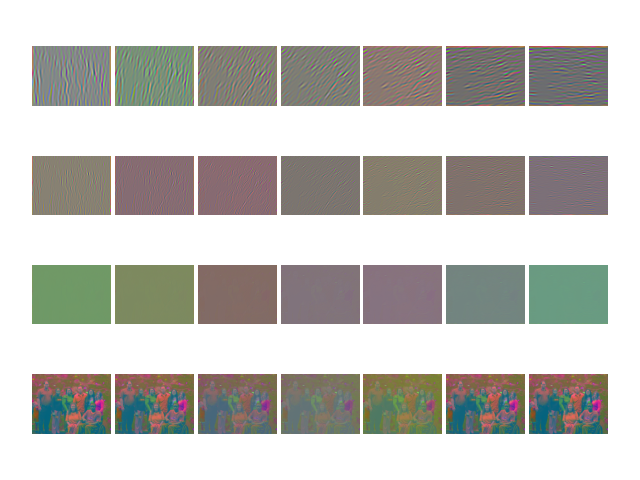

In [ ]:
def train_gist_model(num_workers=4):
    '''
    Creates the dictionary of visual words by clustering using k-means.

    [input]
    * num_workers: number of workers to process in parallel

    [saved]
    * dictionary: numpy.ndarray of shape (K,3F)
    '''

    train_data = np.load("./data/train_data.npz")
    # ----- TODO -----
    list_of_args = []
    
    '''
    Can change these values for experiments, however please submit the dictionary.npy with these values
    alpha=150 and n_clusters = 200
    '''

    image_names = train_data['files']
    labels = train_data['labels']
    num_images = image_names.shape[0]

    for i in range(num_images):
        full_image_name = './data/' + image_names[i]
        list_of_args.append([i, full_image_name])
    
    
    with multiprocess.Pool(num_workers) as p:
        output = p.map(compute_dictionary_one_image, list_of_args)
    
    '''

    HINTS:
    
    1.> Use multiprocessing for parallel processing of elements
    2.> Next, load the tmp files and stack the responses stored as npy
    '''
    # YOUR CODE HERE
    # raise NotImplementedError()
    # filter_responses = np.concatenate(filter_responses, axis=0)
    
    '''
    HINTS:
    1.> use sklearn.cluster.KMeans for clustersing
    2.> dictionary will be the cluster_centers_
    '''
    # YOUR CODE HERE
    ordered_features = np.array(output)
    labels = np.array(labels)

    # raise NotImplementedError()
    np.savez('trained_model_gist.npz', features=ordered_features, labels=labels)

    
# NOTE: comment out the lines below before submitting to gradescope

def helper_func(args):
    i, file_path, trained_features, train_labels = args
    print('Test image - ' + str(i))
    image = io.imread(file_path).astype('float')/255
    test_feat = gist_per_image(image)
    idx = np.argmin(np.sum(np.square(trained_features - test_feat), axis=1))
    pred_label = train_labels[idx]

    return pred_label

def eval_model(num_workers=16):
    test_data = np.load('./data/test_data.npz')

    trained_systems = np.load('trained_model_gist.npz')
    test_labels = test_data['labels']
    image_names = test_data['files']
    test_num = image_names.shape[0]

    trained_features = trained_systems['features']
    train_labels = trained_systems['labels']

    arg_list = []

    for i in range(test_num):
        full_image_name = './data/' + image_names[i]
        arg_list.append([i, full_image_name, trained_features, train_labels])

    with multiprocess.Pool(num_workers) as p:
        output = p.map(helper_func, arg_list)

    ordered_labels = np.array(output)
    test_labels = np.array(test_labels)

    conf_matrix = np.zeros([8,8])
    for i in range(len(test_labels)):
        conf_matrix[test_labels[i], ordered_labels[i]] = conf_matrix[test_labels[i], ordered_labels[i]] + 1

    accuracy = np.trace(conf_matrix)/np.sum(conf_matrix)

    np.save("./conf_matrix_gist.npy",conf_matrix)
    return conf_matrix, accuracy

GIST as I implemented it gave worse performance, at around 28% accuracy. This is probably due to not tuning the GIST parameters (scales, bandwidth and wavelength) appropriately. I would expect GIST to be better than our naive corner based approach, given the correct set of parameters since it encodes a larger amount of local and global information

For my GIST implementation, I took the following parameters:
1. Wavelength = 30
2. Scales = 1,2,4,8
3. Orientations = 0, 15,30,45,60,75,90

Leading to a total of 32 filters per channel - giving a feature set of H X W X 96



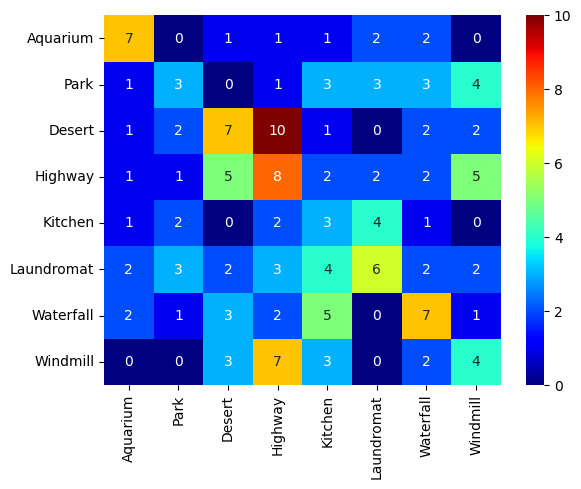
## Accuracy = 0.28

### Q4.2.1 (2 points write up)
**Report the confusion matrix and accuracy for your results in your write-up. Can you comment in your writeup on whether the results are better or worse than classical BoW - why do you think that is?**

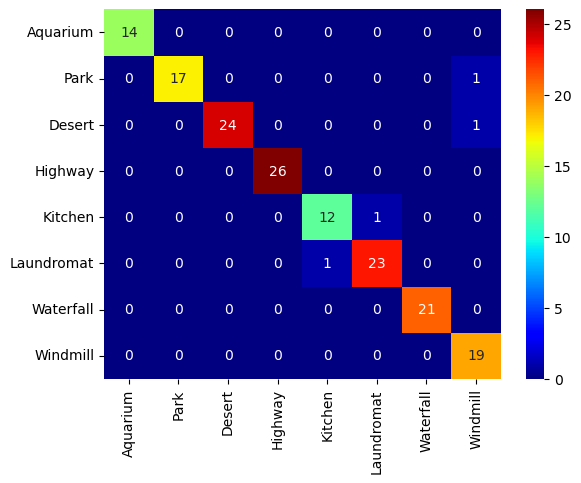
## Accuracy = 0.975

The VGG network gives far better accuracy since it has been trained on far larger set of images and has much more nuanced feature detection through its multiple convolution layers as well as pooling. 

### Q4.3.2 [Extra Credit] (2 points write up)
**Report the confusion matrix and accuracy for your ViT results in your write-up. Can you comment in your writeup on whether the results are better or worse than VGG - why do you think that is? A short answer is okay.**

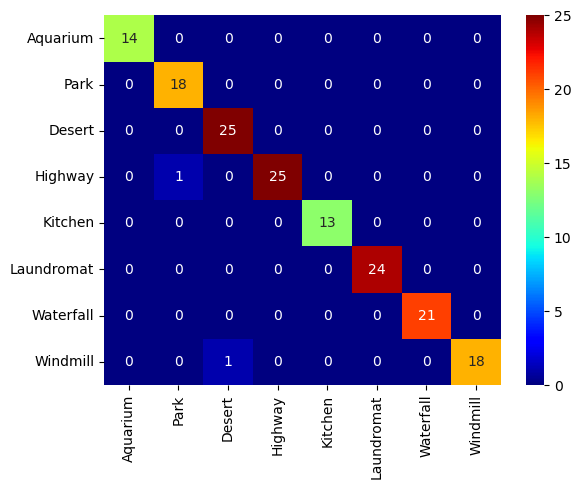
## Accuracy = 0.985

The ViT classifier performs better than VGG - this is due to the use of transformers which are a better feature detector set than VGG layers since CNNs are limited by only relating spatially close features in the image till the final layers, whereas transformers can relate distant features from the initial layers itself

### References

[1]  James Hays and Alexei A Efros. Scene completion using millions of photographs.ACM Transactions onGraphics (SIGGRAPH 2007), 26(3), 2007.

[2]  S. Lazebnik, C. Schmid, and J. Ponce. Beyond bags of features: Spatial pyramid matching for recogniz-ing natural scene categories.  InComputer Vision and Pattern Recognition (CVPR), 2006 IEEE Conferenceon, volume 2, pages 2169–2178, 2006.

[3]  Jian xiong Xiao, J. Hays, K. Ehinger, A. Oliva, and A. Torralba. Sun database: Large-scale scene recogni-tion from abbey to zoo.2010 IEEE Computer Society Conference on Computer Vision and Pattern Recognition,pages 3485–3492, 2010.14